In [452]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras import layers
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

In [453]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [454]:
print(f"Train images shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [455]:
LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [456]:
N_TRAIN_SAMPLES = 45000
N_VAL_SAMPLES = 5000
N_TEST_SAMPLES = 10000
N_CLASSES = 10

In [457]:
x_val = x_train[:N_VAL_SAMPLES].copy()
y_val = y_train[:N_VAL_SAMPLES].copy()

x_train = x_train[N_VAL_SAMPLES:N_TRAIN_SAMPLES+N_VAL_SAMPLES].copy()
y_train = y_train[N_VAL_SAMPLES:N_TRAIN_SAMPLES+N_VAL_SAMPLES].copy()


In [458]:
print(f"Train images shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Validation images shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")

Train images shape: (45000, 32, 32, 3)
Train labels shape: (45000, 1)
Validation images shape: (5000, 32, 32, 3)
Validation labels shape: (5000, 1)


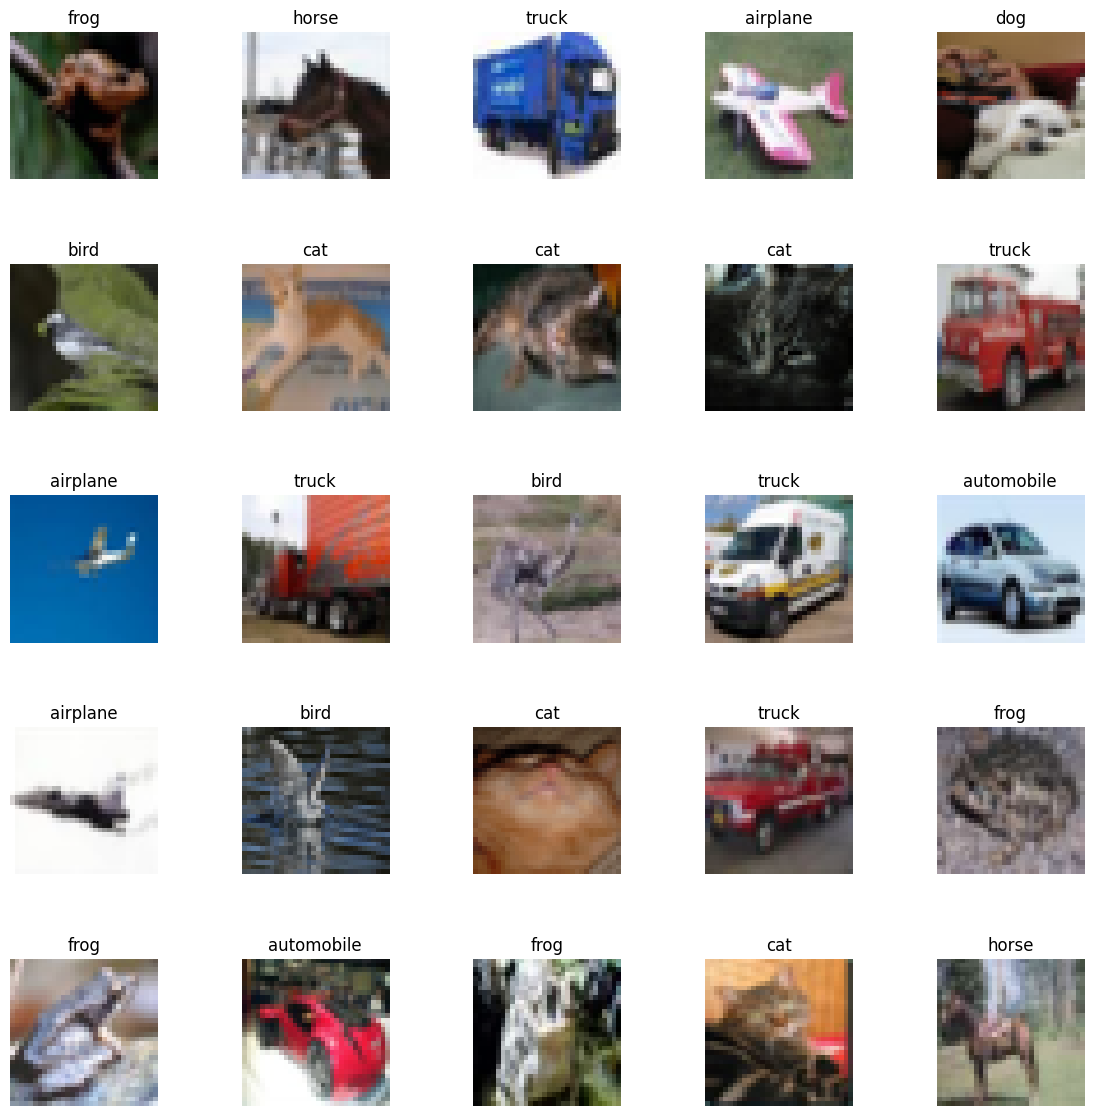

In [459]:
fig, axes = plt.subplots(5, 5, figsize=[12, 12])
fig.tight_layout(pad=3.0)
axes = axes.ravel()
for i in range (25):
  axes[i].imshow(x_train[i])
  axes[i].set_title(LABELS[y_train[i][0]])
  axes[i].axis('off')

plt.show()

In [460]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255

y_train = to_categorical(y_train, N_CLASSES)
y_test = to_categorical(y_test, N_CLASSES)
y_val = to_categorical(y_val, N_CLASSES)

In [461]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

airplane


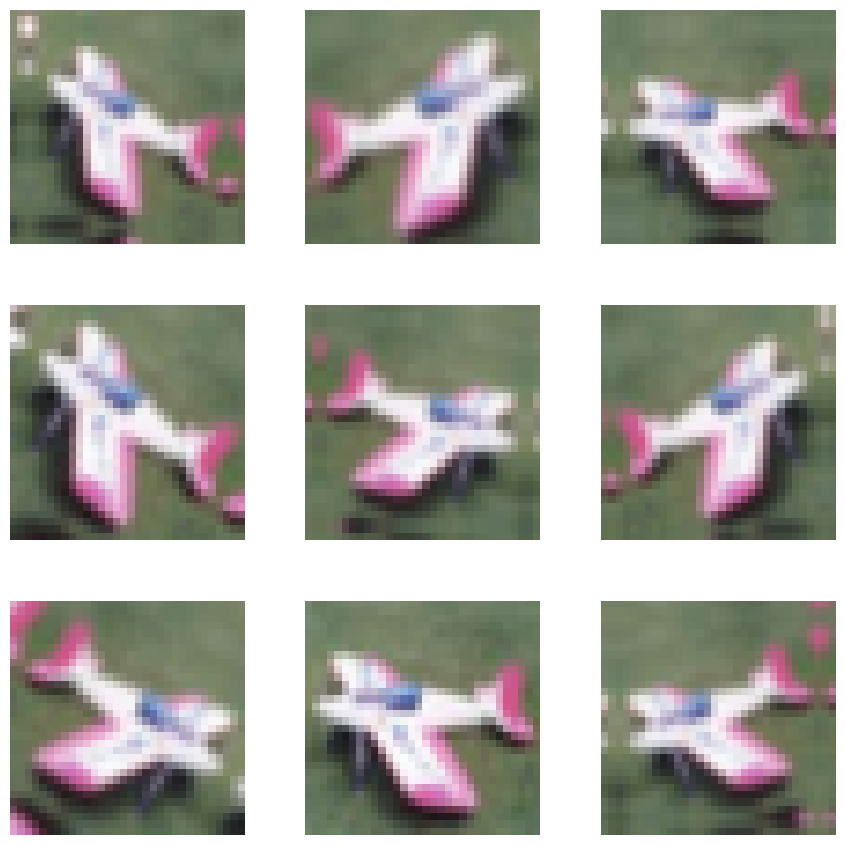

In [462]:
image_id = 3
image = x_train[image_id]
label = np.argmax(y_train[image_id])
print(LABELS[label])
fig, axes = plt.subplots(3, 3, figsize=[9, 9])
fig.tight_layout(pad=1.0)
axes = axes.ravel()
for i in range(9):
    augmented_image = data_augmentation(image)
    axes[i].imshow(augmented_image)
    axes[i].axis('off')

plt.show()

In [463]:
model = keras.models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(data_augmentation)
model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.25))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=N_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_46 (Sequential)  (32, 32, 3)               0         
                                                                 
 conv2d_259 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_64 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_260 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_65 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_52 (Dropout)        (None, 32, 32, 32)      

In [464]:
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [465]:
N_EPOCHS = 100
history = model.fit(x_train, y_train, batch_size=128, epochs=N_EPOCHS, validation_data=(x_val, y_val))

Epoch 1/100


2024-01-28 17:00:31.701790: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_47/dropout_52/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


352/352 [==============================] - 14s 30ms/step - loss: 1.9278 - accuracy: 0.3500 - val_loss: 2.4638 - val_accuracy: 0.2010
Epoch 2/100
352/352 [==============================] - 9s 26ms/step - loss: 1.4230 - accuracy: 0.4921 - val_loss: 1.3974 - val_accuracy: 0.4870
Epoch 3/100
352/352 [==============================] - 9s 27ms/step - loss: 1.2524 - accuracy: 0.5528 - val_loss: 1.3029 - val_accuracy: 0.5330
Epoch 4/100
352/352 [==============================] - 9s 26ms/step - loss: 1.1384 - accuracy: 0.5996 - val_loss: 1.0278 - val_accuracy: 0.6338
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 1.0483 - accuracy: 0.6306 - val_loss: 0.9323 - val_accuracy: 0.6884
Epoch 6/100
352/352 [==============================] - 9s 27ms/step - loss: 0.9859 - accuracy: 0.6577 - val_loss: 0.8364 - val_accuracy: 0.7158
Epoch 7/100
352/352 [==============================] - 9s 27ms/step - loss: 0.9340 - accuracy: 0.6764 - val_loss: 0.8295 - val_accuracy: 0.7160
Ep

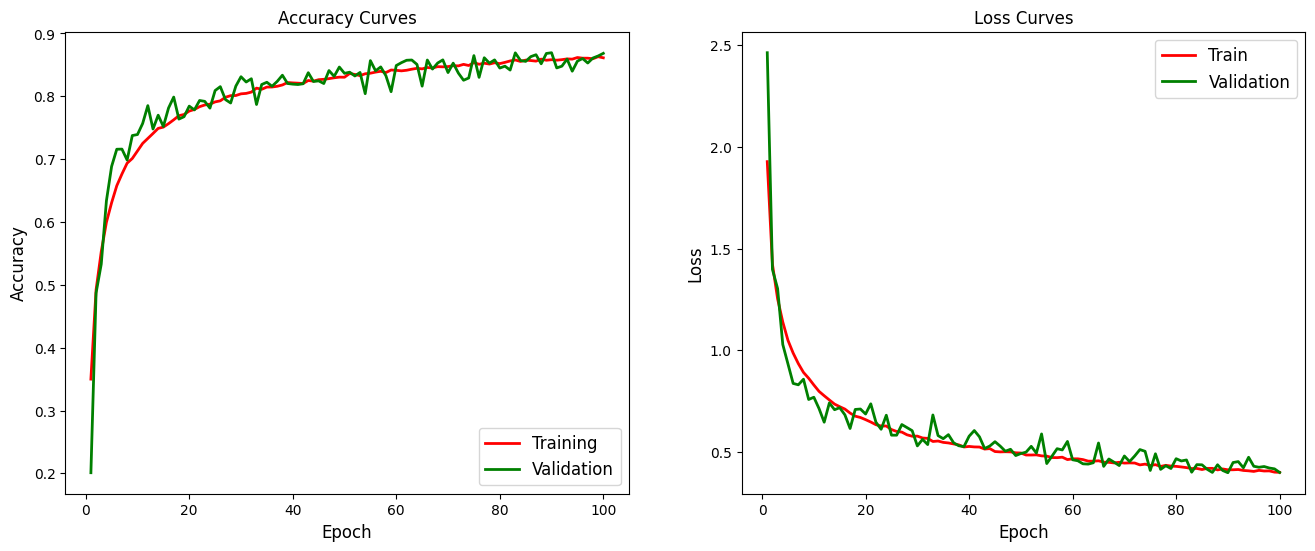

In [466]:
plt.figure(figsize=[16, 6])
plt.subplot(1, 2, 1)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], color="red", linewidth="2.0", label="Training")
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], color="green", linewidth="2.0", label="Validation")
plt.title("Accuracy Curves")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=12)


plt.subplot(1, 2, 2)
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], color="red", linewidth="2.0", label="Train")
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], color="green", linewidth="2.0", label="Validation")
plt.title("Loss Curves")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [467]:
N_PREDS = 25
pred_images = x_test[:N_PREDS]
pred_labels = y_test[:N_PREDS]

predictions = model.predict(pred_images)
print(predictions.shape)
print(predictions)
predictions = np.argmax(predictions, axis=1)
print(predictions.shape)
print(predictions)

1/1 [==============================] - 0s 122ms/step
(25, 10)
[[6.20364270e-04 3.66294989e-04 1.84631962e-02 8.92195225e-01
  1.23059133e-03 6.95319921e-02 1.64206102e-02 2.64150091e-04
  5.53954626e-04 3.53597658e-04]
 [2.09836452e-03 2.21811628e-04 4.01475108e-06 1.77608604e-06
  7.00608780e-07 1.75553382e-07 3.91210051e-06 2.78598662e-07
  9.97633815e-01 3.50668925e-05]
 [6.44479319e-03 3.57170450e-03 2.71535100e-04 1.56589507e-04
  9.25090353e-05 3.06127658e-05 8.21542562e-05 1.34525035e-04
  9.84479487e-01 4.73596994e-03]
 [1.96285456e-01 4.82928520e-03 2.47309124e-03 6.09760231e-04
  2.70223449e-04 3.34196666e-05 2.61039793e-04 1.05394945e-04
  7.74530053e-01 2.06023492e-02]
 [1.12630878e-05 1.29751998e-05 3.11816111e-03 2.00982997e-03
  2.62988382e-03 2.57091579e-05 9.92166162e-01 2.88298293e-06
  1.54562040e-05 7.72731710e-06]
 [1.62094278e-04 7.79363836e-06 1.88046449e-03 3.82155622e-03
  2.20367895e-03 2.27141101e-03 9.89412129e-01 8.74876787e-05
  4.85773890e-05 1.04815845e-

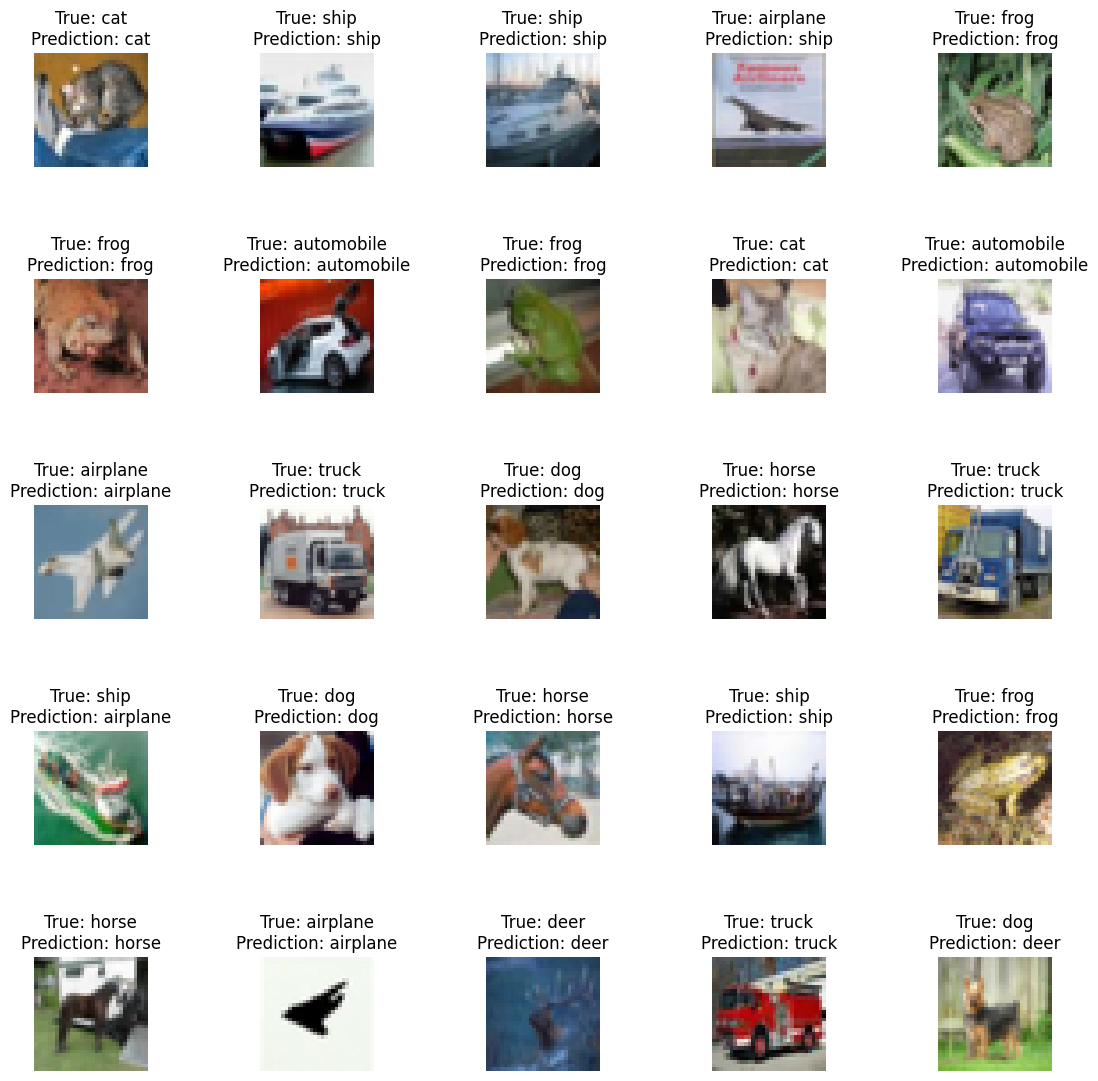

In [468]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
fig.tight_layout(pad=5.0)
axes = axes.ravel()

for i in range(0, N_PREDS):
    axes[i].imshow(pred_images[i])
    axes[i].set_title(f"True: {LABELS[np.argmax(pred_labels[i])]}\nPrediction: {LABELS[predictions[i]]}")
    axes[i].axis('off')

plt.show()

In [469]:
test_results = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4320 - accuracy: 0.8540


In [470]:
print(f"Test Accuracy: {test_results[1]}\nTest Loss: {test_results[0]}")

Test Accuracy: 0.8539999723434448
Test Loss: 0.432021826505661
